# Module 2 - Exercise 1: Autograd Exploration

## Learning Objectives
- Master PyTorch's automatic differentiation system
- Understand computational graphs and gradient flow
- Practice with multivariable gradients and chain rule
- Explore gradient context management
- Implement higher-order derivatives

## Prerequisites
- Completion of Module 1 exercises
- Understanding of calculus derivatives
- Familiarity with chain rule

## Setup and Test Repository

First, let's clone the test repository and set up our environment for step-by-step validation.

In [2]:
# @title 默认标题文本
# Clone the test repository
!git clone https://github.com/racousin/data_science_practice.git /tmp/tests 2>/dev/null || true

# Import required modules
import sys
sys.path.append('/tmp/tests/tests/python_deep_learning')

# Import the improved test utilities
from test_utils import NotebookTestRunner, create_inline_test
from module2.test_exercise1 import Exercise1Validator, EXERCISE1_SECTIONS

# Create test runner and validator
test_runner = NotebookTestRunner("module2", 1)
validator = Exercise1Validator()

print("Test framework setup complete!")

Test framework setup complete!


## Environment Setup

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Print PyTorch version
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

PyTorch version: 2.8.0+cu126
CUDA available: False


## Section 1: Basic Autograd Operations

Learn the fundamentals of automatic differentiation with simple scalar functions.

In [18]:
# TODO: Create a tensor that requires gradients and compute a simple function
# Create x = 2.0 with requires_grad=True
x = torch.tensor(2.0, requires_grad=True)

# TODO: Compute y = x^2 + 3*x + 1
y = x**2 + 3*x + 1

print(f"x = {x}")
print(f"y = {y}")
print(f"x.requires_grad: {x.requires_grad}")
print(f"y.requires_grad: {y.requires_grad}")

x = 2.0
y = 11.0
x.requires_grad: True
y.requires_grad: True


In [19]:
# TODO: Compute gradients using backward()
# Call y.backward() to compute gradients

print(f"dy/dx = {x.grad}")
print(f"Expected: dy/dx = 2x + 3 = 2*2 + 3 = 7")

dy/dx = None
Expected: dy/dx = 2x + 3 = 2*2 + 3 = 7


In [ ]:
# Test Section 1: Basic Autograd Operations
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE1_SECTIONS["Section 1: Basic Autograd Operations"]]
test_runner.test_section("Section 1: Basic Autograd Operations", validator, section_tests, locals())

## Section 2: Multivariable Gradients

Explore gradients with functions of multiple variables.

In [32]:
# TODO: Create two variables with gradients enabled x1 = 1.0, x2 = 2.0
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)

# TODO: Compute z = x1^2 + x2^3 + x1*x2
z = x1**2 + x2**3 + x1*x2

print(f"x1 = {x1}, x2 = {x2}")
print(f"z = {z}")

x1 = 1.0, x2 = 2.0
z = 11.0


In [33]:
# TODO: Compute gradients for multivariable function
# Call z.backward() to compute partial derivatives
z.backward()
print(f"∂z/∂x1 = {x1.grad if x1 is not None else None}")
print(f"∂z/∂x2 = {x2.grad if x2 is not None else None}")
print(f"Expected: ∂z/∂x1 = 2*x1 + x2 = 2*1 + 2 = 4")
print(f"Expected: ∂z/∂x2 = 3*x2^2 + x1 = 3*4 + 1 = 13")

∂z/∂x1 = 4.0
∂z/∂x2 = 13.0
Expected: ∂z/∂x1 = 2*x1 + x2 = 2*1 + 2 = 4
Expected: ∂z/∂x2 = 3*x2^2 + x1 = 3*4 + 1 = 13


In [ ]:
# Test Section 2: Multivariable Gradients
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE1_SECTIONS["Section 2: Multivariable Gradients"]]
test_runner.test_section("Section 2: Multivariable Gradients", validator, section_tests, locals())

## Section 3: Vector and Matrix Gradients

Work with gradients of vector and matrix operations.

In [34]:
# TODO: Create a vector [1.0, 2.0, 3.0] with gradients and compute a scalar loss
vec_x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# TODO: Compute sum of squares sum(vec_x**2)
vec_sum = torch.sum(vec_x**2)

print(f"vec_x = {vec_x}")
print(f"vec_sum = {vec_sum}")

vec_x = tensor([1., 2., 3.], requires_grad=True)
vec_sum = 14.0


In [36]:
# TODO: Compute gradients for vector function
# Call vec_sum.backward()
vec_sum.backward()
print(f"∇vec_sum = {vec_x.grad}")
print(f"Expected: gradient should be 2*vec_x = [2, 4, 6]")

∇vec_sum = tensor([2., 4., 6.])
Expected: gradient should be 2*vec_x = [2, 4, 6]


In [ ]:
# Test vector gradients (first part of Section 3)
vec_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE1_SECTIONS["Section 3: Vector and Matrix Gradients"][:3]]
test_runner.test_section("Section 3a: Vector Gradients", validator, vec_tests, locals())

In [37]:
# TODO: Create a matrix [[1.0, 2.0], [3.0, 4.0]] and compute gradients
mat_A = torch.tensor([[1.0, 2.0], [3.0, 4.0]], requires_grad=True)

# TODO: Compute mat_sum = sum of squares of all elements
mat_sum = torch.sum(mat_A**2)  # torch.sum(mat_A**2)

print(f"mat_A = \n{mat_A}")
print(f"mat_sum = {mat_sum}")

mat_A = 
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
mat_sum = 30.0


In [39]:
# TODO: Compute matrix gradients
# Call mat_sum.backward()
mat_sum.backward()
print(f"∇mat_A = \n{mat_A.grad}")
print(f"Expected: gradient should be 2*mat_A")

∇mat_A = 
tensor([[2., 4.],
        [6., 8.]])
Expected: gradient should be 2*mat_A


In [ ]:
# Test matrix gradients (second part of Section 3)
mat_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE1_SECTIONS["Section 3: Vector and Matrix Gradients"][3:]]
test_runner.test_section("Section 3b: Matrix Gradients", validator, mat_tests, locals())

## Section 4: Computational Graph and Chain Rule

Understand how PyTorch builds and traverses computational graphs.

In [41]:
!pip install torchviz # uncomment if needed

x = 2.0


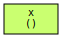

In [44]:
from torchviz import make_dot # display with
# TODO: Build a computational graph step by step
x = torch.tensor(2.0,requires_grad=True)  # torch.tensor(2.0, requires_grad=True)
print(f"x = {x}")
dot = make_dot(x, params={"x": x})
dot

y = x^2 = 4.0


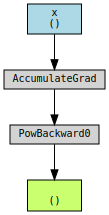

In [45]:
# TODO: Build computation step by step
y = x**2  # xˆ2
print(f"y = x^2 = {y}")
dot = make_dot(y, params={"x": x})
dot

z = 3y + 1 = 13.0


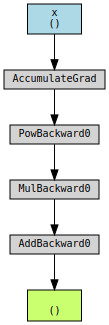

In [46]:
z = 3*y+1  # 3y + 1
print(f"z = 3y + 1 = {z}")
dot = make_dot(z, params={"x": x})
dot

w = z^2 = 169.0


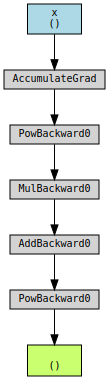

In [47]:
w = z**2  # z^2
print(f"w = z^2 = {w}")
dot = make_dot(w, params={"x": x})
dot

In [49]:
# TODO: Compute gradients through the computational graph
# Call graph_w.backward()
graph_x = torch.tensor(2.0, requires_grad=True)
graph_y = graph_x**2
graph_z = 3*graph_y + 1
graph_w = graph_z**2
graph_w.backward()
print(f"dw/dx = {graph_x.grad}")
print(f"Chain rule: dw/dx = dw/dz * dz/dy * dy/dx")
print(f"dw/dz = 2*z = 2*13 = 26")
print(f"dz/dy = 3")
print(f"dy/dx = 2*x = 2*2 = 4")
print(f"Therefore: dw/dx = 26 * 3 * 4 = 312")

dw/dx = 312.0
Chain rule: dw/dx = dw/dz * dz/dy * dy/dx
dw/dz = 2*z = 2*13 = 26
dz/dy = 3
dy/dx = 2*x = 2*2 = 4
Therefore: dw/dx = 26 * 3 * 4 = 312


## Section 5: Gradient Context Management

Learn to control when gradients are computed and stored.

In [50]:
# TODO: Use torch.no_grad() context
x = torch.tensor(3.0, requires_grad=True)

# TODO: Compute operation within no_grad context
with torch.no_grad():
    no_grad_result = x**2 + 2*x  # x**2 + 2*x

print(f"no_grad_result = {no_grad_result}")
print(f"requires_grad: {no_grad_result.requires_grad}")

no_grad_result = 15.0
requires_grad: False


In [51]:
# TODO: Use .detach() to remove tensor from computational graph
y = x**3 + x
y_detached_result = y.detach()

print(f"Original y requires_grad: {y.requires_grad}")
print(f"Detached result requires_grad: {y_detached_result.requires_grad}")
print(f"Values are equal: {torch.equal(y, y_detached_result)}")

Original y requires_grad: True
Detached result requires_grad: False
Values are equal: True


In [ ]:
# Test Section 5: Gradient Context Management
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE1_SECTIONS["Section 5: Gradient Context Management"]]
test_runner.test_section("Section 5: Gradient Context Management", validator, section_tests, locals())

## Section 6: Higher-Order Derivatives

Compute second derivatives and higher-order gradients.

In [53]:
# TODO: Compute second derivative
x = torch.tensor(2.0, requires_grad=True)

# TODO: Define function f(x) = x^4
y = x**4

# TODO: Compute first derivative
# y.backward(create_graph=True)  # create_graph=True allows computing gradients of gradients
# first_derivative = x.grad.clone()
y.backward(create_graph=True)
first_derivative = x.grad.clone()
print(f"f(x) = x^4, x = {x}")

# print(f"f'(x) = 4x^3 = {first_derivative}")
print(f"f'(x) = 4x^3 = {first_derivative}")
# TODO: Compute second derivative
# x.grad.zero_()  # Clear first derivative
# first_derivative.backward()
x.grad.zero_()
first_derivative.backward()
second_derivative = x.grad  # x.grad

print(f"f''(x) = 12x^2 = {second_derivative}")
print(f"Expected: f''(2) = 12*4 = 48")

f(x) = x^4, x = 2.0
f'(x) = 4x^3 = 32.0
f''(x) = 12x^2 = 48.0
Expected: f''(2) = 12*4 = 48


In [ ]:
# Test Section 6: Higher-Order Derivatives
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE1_SECTIONS["Section 6: Higher-Order Derivatives"]]
test_runner.test_section("Section 6: Higher-Order Derivatives", validator, section_tests, locals())

## Section 7: Gradient Flow Visualization

Visualize how gradients flow through computational graphs.

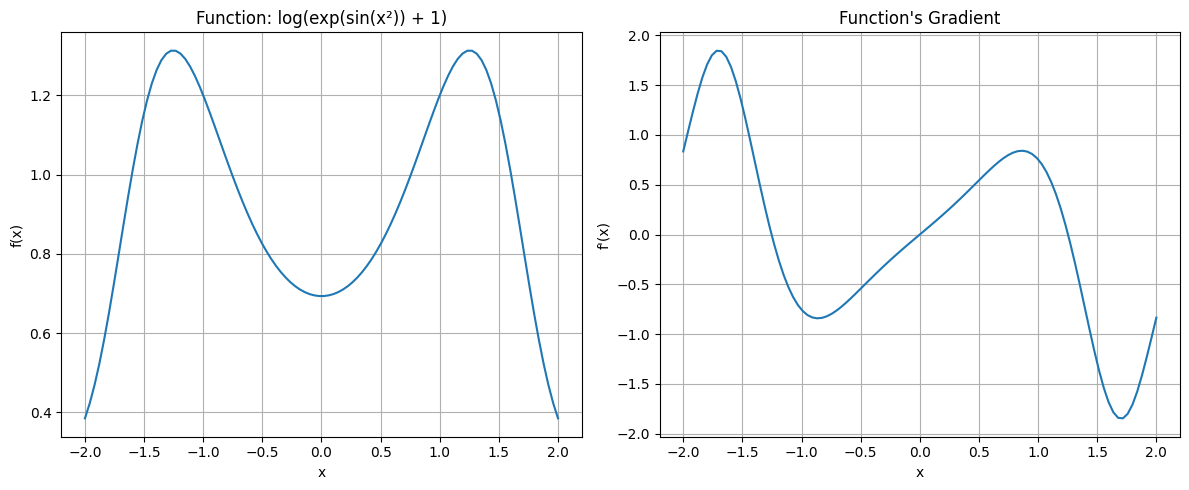

The gradient plot shows how the derivative changes across the input domain.
Notice how the gradient reflects the slope of the original function.


In [54]:
# Create a more complex computational graph for visualization
def create_complex_function(x):
    """Create a complex function for gradient flow analysis"""
    a = x**2
    b = torch.sin(a)
    c = torch.exp(b)
    d = torch.log(c + 1)
    return d

# Test with different input values
x_values = torch.linspace(-2, 2, 100)
gradients = []

for x_val in x_values:
    x = torch.tensor(x_val.item(), requires_grad=True)
    y = create_complex_function(x)
    y.backward()
    gradients.append(x.grad.item())

# Plot function and its gradient
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
with torch.no_grad():
    y_values = [create_complex_function(x).item() for x in x_values]
plt.plot(x_values.numpy(), y_values)
plt.title('Function: log(exp(sin(x²)) + 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_values.numpy(), gradients)
plt.title("Function's Gradient")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

print("The gradient plot shows how the derivative changes across the input domain.")
print("Notice how the gradient reflects the slope of the original function.")